# Bubble

This is a more in-depth tutorial/example of the functionality contained in the BubbleGenerator class (from bubble.py)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import optimize as opt
%matplotlib inline

from dga import matsubara_frequencies as mf
from dga import brillouin_zone as bz
from dga import wannier
from dga import two_point as twop
from dga import bubble as bub
from test_util import test_data as td


In [2]:
# Load the test data
ddict, hr = td.load_minimal_dataset()

In [3]:
# Construct the Green's function
nk = (64, 64, 1)
k_grid = bz.KGrid(nk)
ek = hr.get_ek(k_grid)
siwk_obj = twop.SelfEnergy(ddict['siw'][None, None, None, :], ddict['beta'])
giwk_obj = twop.GreensFunction(siwk_obj, ek, n=ddict['n'], niv_asympt=6000)

In [4]:
# define the bubble generator
niw_core = 30
niv_core = 30
niv_shell = 500
wn_core = mf.wn(niw_core)
bubble_gen = bub.BubbleGenerator(wn_core,giwk_obj)

chi0_core = bubble_gen.get_chi0(niv=niv_core)
chi0_shell = bubble_gen.get_chi0(niv=niv_shell)
chi0_asympt = bubble_gen.get_chi0(niv=niv_shell, do_asympt=True)


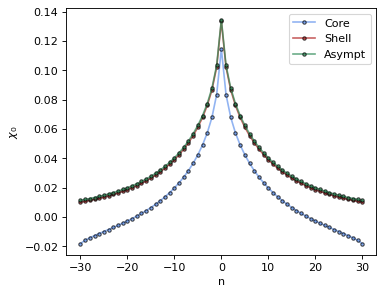

In [5]:
# plot the bubble
plt.figure(figsize=(5,4) ,dpi=80)
plt.plot(wn_core, chi0_core.real,'-o', color='cornflowerblue',markeredgecolor='k', label=r'Core',alpha=0.7)
plt.plot(wn_core, chi0_shell.real,'-o', color='firebrick',markeredgecolor='k', label=r'Shell',alpha=0.7)
plt.plot(wn_core, chi0_asympt.real,'-o', color='seagreen',markeredgecolor='k', label=r'Asympt',alpha=0.7)
plt.legend()
plt.xlabel('n')
plt.ylabel(r'$\chi_0$')
plt.show()


In [6]:
# set up the bubble generator:
niw_bub = 0
wn_bub = mf.wn(niw_bub)
bubble_gen = bub.BubbleGenerator(wn_bub, giwk_obj)

# local part:
niv_core_list = np.array([50, 100, 300, 1000, 2000, 3000, 4000, 5000][::-1])
chi0 = np.array([bubble_gen.get_chi0(niv_core)[0] for niv_core in niv_core_list])
chi0_asympt = np.array([bubble_gen.get_chi0(niv_core, do_asympt=True)[0] for niv_core in niv_core_list])

fit_fun = lambda x, a, b: a + b * x
n_fit = 5
popt, pcov = opt.curve_fit(fit_fun, 1/niv_core_list[:n_fit], chi0[:n_fit].real)
chi0_extrap = fit_fun(0, *popt)
popt, pcov = opt.curve_fit(fit_fun, 1/niv_core_list, chi0_asympt.real)
chi0_extrap_asympt = fit_fun(0, *popt)
print('chi0_extrap = ', np.round(chi0_extrap,decimals=6))
print('chi0_asympt[100] = ', np.round(chi0_asympt[-2].real,decimals=6))
print('chi0_extrap_asympt = ', np.round(chi0_extrap_asympt,decimals=6))


chi0_extrap =  0.134632
chi0_asympt[100] =  0.134631
chi0_extrap_asympt =  0.134633


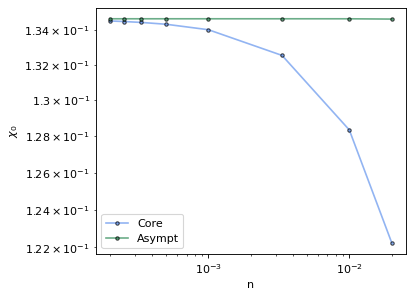

In [7]:
# plot the asymptotic extraction:

n_plot = len(niv_core_list)
plt.figure(figsize=(5,4) ,dpi=80)
plt.loglog(1/niv_core_list[:n_plot], chi0.real[:n_plot],'-o', color='cornflowerblue',markeredgecolor='k', label=r'Core',alpha=0.7)
plt.loglog(1/niv_core_list[:n_plot], chi0_asympt.real[:n_plot],'-o', color='seagreen',markeredgecolor='k', label=r'Asympt',alpha=0.7)
plt.legend()
plt.xlabel('n')
plt.ylabel(r'$\chi_0$')
plt.show()

In [8]:
# Check the full-w consistency

niw_bub = 50
niv_bub = 100
wn_bub = mf.wn(niw_bub)
bubble_gen = bub.BubbleGenerator(wn_bub, giwk_obj, is_full_wn=True)
bubble_gen_2 = bub.BubbleGenerator(wn_bub, giwk_obj, is_full_wn=False)

gchi0 = bubble_gen.get_gchi0(niv_bub)
gchi0_2 = bubble_gen_2.get_gchi0(niv_bub)

print(gchi0_2.shape)

(101, 200)


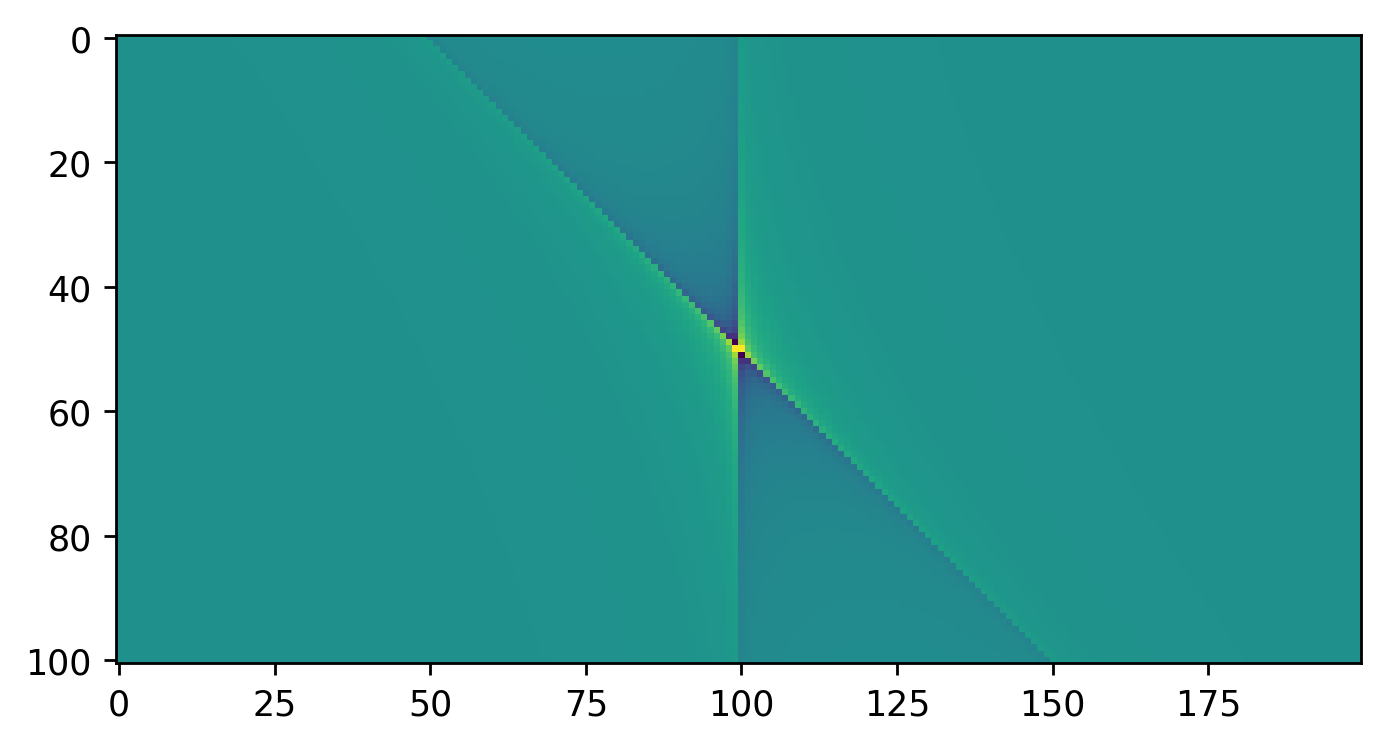

In [9]:
plt.figure()
plt.imshow(gchi0.real)
# plt.imshow(gchi0_2.real)
plt.show()

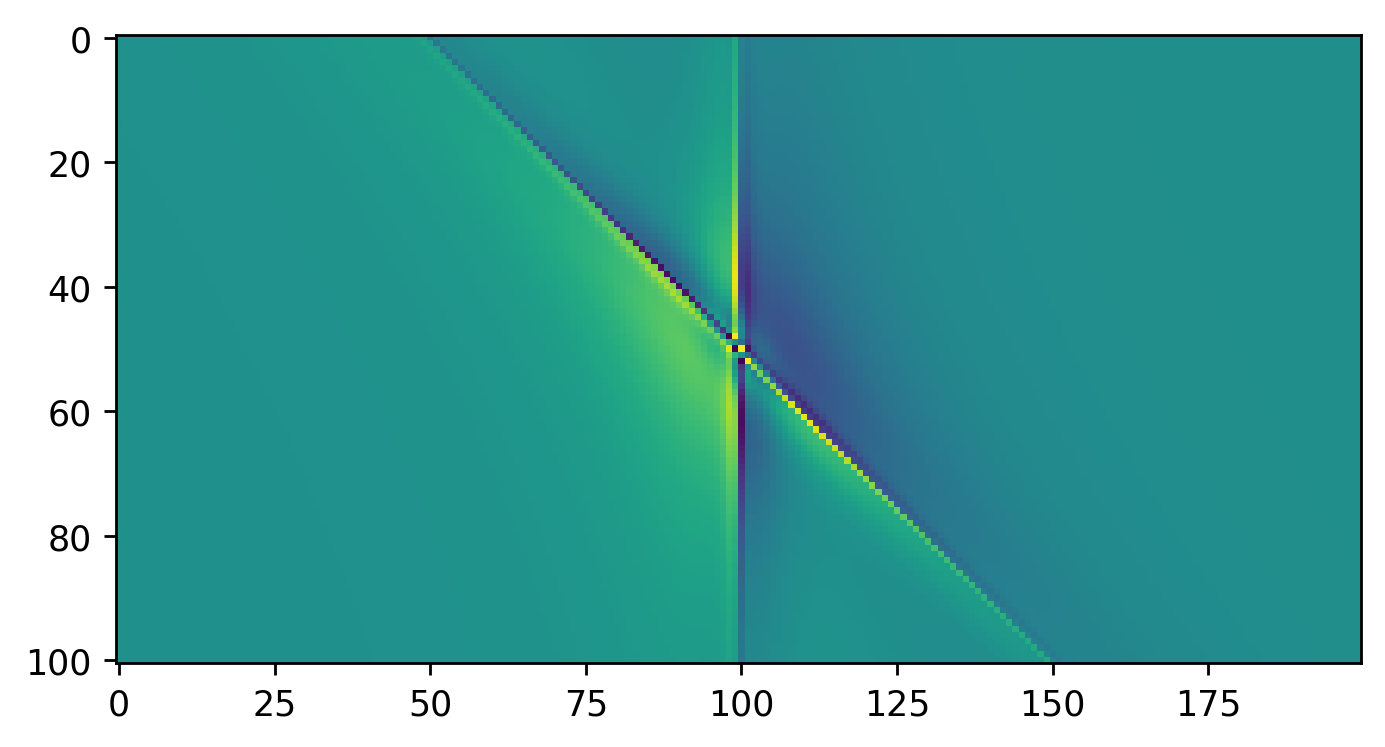

In [10]:
plt.figure()
plt.imshow(gchi0.imag)
# plt.imshow(gchi0_2.imag)
plt.show()

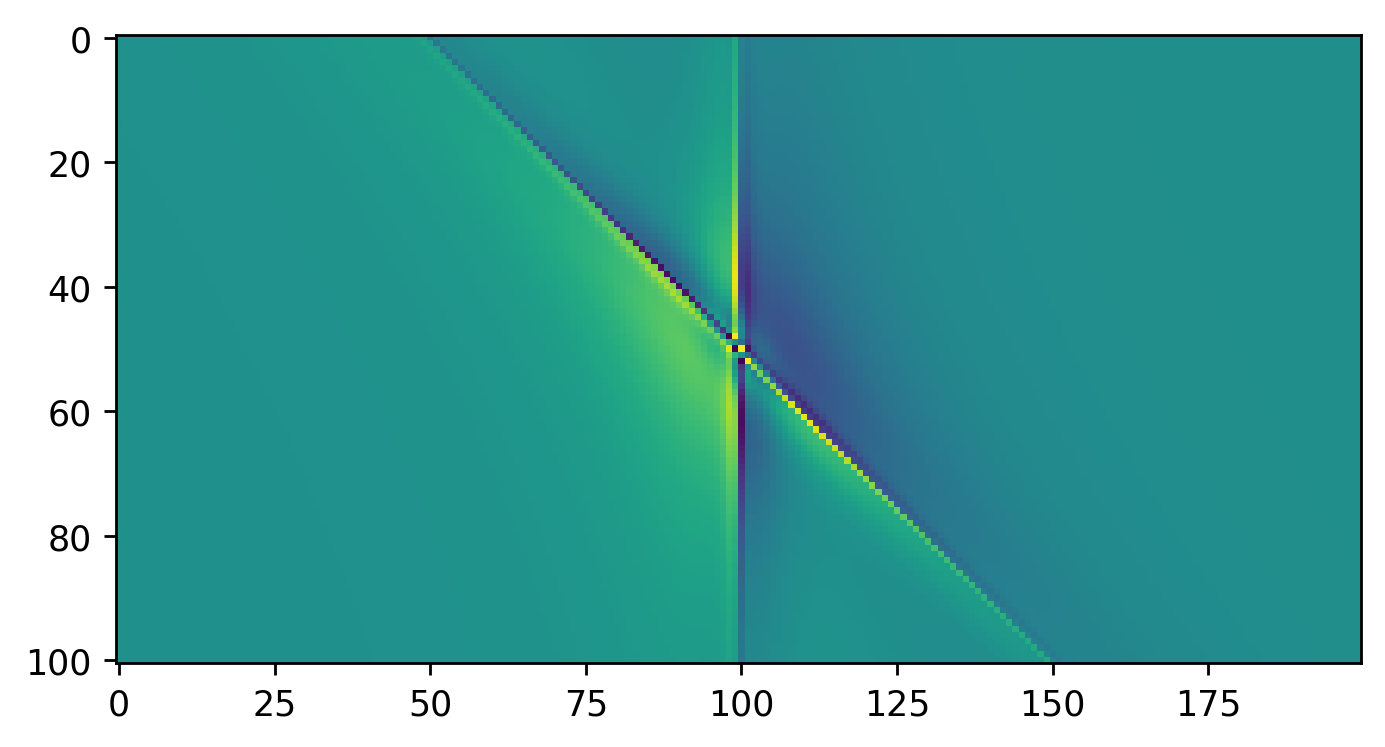

In [11]:
plt.figure()
# plt.imshow(gchi0.imag)
plt.imshow(gchi0_2.imag)
plt.show()